In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ImageCryptography
import Paillier

In [3]:
import cv2

In [4]:
classes = {"no_tumor":0, "pituitary_tumor":1}
X = []
Y = []
for c in classes:
    path = "C:\\Users\\Administrator\\Downloads\\Compressed\\Homomorphic-Image-Encryption-master\\encrypted-images\\Training\\"+c
    for x in os.listdir(path):
        encryptedpath = "encrypted-images/Training/"+c+"/"+x
        img = ImageCryptography.loadEncryptedImg(encryptedpath)
        img = np.array(img, dtype='uint8')
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[c])

In [5]:
X = np.array(X)
Y = np.array(Y)
X_reshaped = X.reshape(len(X), -1)
print(X.shape, X_reshaped.shape, np.unique(Y))

(1222, 256, 256) (1222, 65536) [0 1]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_reshaped)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, random_state = 1, test_size = 0.15)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=1)
lg.fit(X_train, Y_train)

LogisticRegression(C=1)

In [10]:
lg_tn = lg.score(X_train, Y_train)
lg_ts = lg.score(X_test, Y_test)
print("train score", lg_tn)
print("test score", lg_ts)

train score 1.0
test score 0.6467391304347826


In [11]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, Y_train)

SVC()

In [12]:
sv_tn = sv.score(X_train, Y_train)
sv_ts = sv.score(X_test, Y_test)
print("train score", sv_tn)
print("test score", sv_ts)

train score 1.0
test score 0.6467391304347826


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [14]:
rfc_tn = rfc.score(X_train, Y_train)
rfc_ts = rfc.score(X_test, Y_test)
print("train score", rfc_tn)
print("test score", rfc_ts)

train score 1.0
test score 0.6467391304347826


In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [16]:
gnb_tn = gnb.score(X_train, Y_train)
gnb_ts = gnb.score(X_test, Y_test)
print("train score", gnb_tn)
print("test score", gnb_ts)

train score 1.0
test score 0.6467391304347826


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3', '4', '5', '6', '7'])

In [18]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(principalDf, Y, random_state = 45, test_size = 0.2)

In [19]:
X_train1.shape

(977, 7)

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(X_train1, Y_train1)

GaussianNB()

In [21]:
gnb_tn1 = gnb1.score(X_train1, Y_train1)
gnb_ts1 = gnb1.score(X_test1, Y_test1)
print("train score", gnb_tn1)
print("test score", gnb_ts1)

train score 0.6714431934493347
test score 0.7061224489795919


In [22]:
test_scores = [lg_ts, sv_ts, rfc_ts, gnb_ts, gnb_ts1]
test_scores = np.array(test_scores)
test_scores = test_scores*100

In [23]:
model_names = ['Logistic Regg', 'SVM', 'Random Forest', 'Gaussian \n NB', 'Gaussian NB \n (PCA(7))']

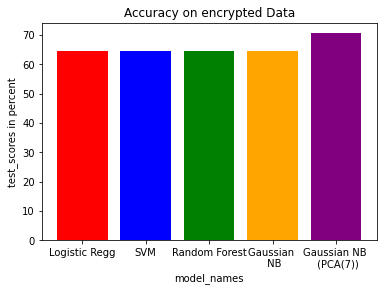

In [24]:
plt.bar(model_names,test_scores, color = ['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('model_names')
plt.ylabel("test_scores in percent")
plt.title('Accuracy on encrypted Data')
plt.show()

In [25]:
from sklearn.metrics import log_loss

In [26]:
logloss = log_loss(Y_test1, gnb1.predict_proba(X_test1))
logloss

0.6199897265473263

In [27]:
class1 = ['Unencryped','Encrypted']
log_loss = [2.917444327635508, 0.6199897265473263]

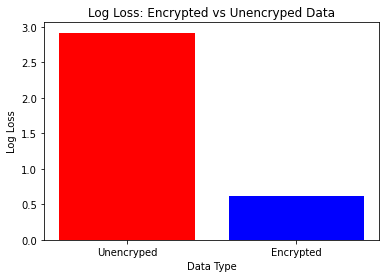

In [28]:
plt.bar(class1, log_loss, color = ['red', 'blue'])
plt.xlabel('Data Type')
plt.ylabel("Log Loss")
plt.title('Log Loss: Encrypted vs Unencryped Data')
plt.show()